# Домашнее задание №6

Где дешевле жить? Предсказание цен в Airbnb - учимся генерировать признаки и интерпретировать результаты модели.

<b>Цель:</b>
В этом проекте вы потренируетесь строить интерпретируемые модели линейной регрессии с регуляризацией и без,
а также придумывать новые признаки для улучшения качества модели.

<b>Описание/Пошаговая инструкция выполнения домашнего задания:</b>

<b>Часть 1. EDA</b>

1. Скачайте данные с Kaggle по ценам на жильё в Airbnb в Нью-Йорке:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
2. Пройдите по основным шагам работы с данными:
* выкиньте ненужные признаки: id, name, host_id, host_name, last_review
* визуализируйте базовые статистики данных: распределения признаков, матрицу попарных корреляций, постройте pair plots
* про результатам анализа произведите предобработку переменных.

<b>Часть 2. Preprocessing & Feature Engineering</b>
1. Ваша цель получить как можно более высокие метрики качества (можно взять несколько, R2, MAE, RMSE),
сконцентрировавшись на преобразовании признаков.
Опробуйте различные техники:
* работа с категориальными переменными (можно начать с dummy);
* замена аномалий;
* различные варианты шкалирования непрерывных переменных (StandardScaler, RobustScaler, и.т.д.);
* обратите внимание на распределение целевой переменной, возможно, с ней тоже можно поработать;
2. Попробуйте на основании имеющихся переменных создать новые, которые могли бы улучшить качество модели.
Например, можно найти координаты Манхэттена (самого дорогого района) и при помощи широты и долготы,
а также евклидового расстояния создать новую переменную - расстояние от квартиры до этого района.
Возможно, такой признак будет работать лучше, чем просто широта и долгота.

<b>Часть 3. Моделирование</b>
1. Отложите 30% данных для тестирования.
2. Постройте модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
3. Измерьте качество каждой и визуализируйте важность признаков.
4. Сделайте интересные выводы :)

# Краткое описание получившихся результатов.

В текущем домашнем задании я провёл анализ данных,
убрал ненужные признаки из датасета ('id', 'name', 'host_id', 'host_name', 'last_review'),
обработал пропущенные значения, преобразовал категориальные признаки ('neighbourhood_group', 'room_type', 'neighbourhood')
с помощью One-Hot Encoding и обработал выбросы по целевой переменной 'price'.
</br></br>Далее я провёл обучение модели с помощью алгоритма линейной регрессии
и методов регуляризации RidgeCV, LassoCV и ElasticNetCV, затем сделал оценку с помощью метрик качества R2 Score, MAE, и RMSE.
Обучение и оценку я выполнял для нескольких вариантов, в каждом варианте я делал преобразование данных.
Ниже описаны варианты преобразования данных для обучения и оценка качества с помощью метрик (в виде таблицы).

<b>Вариант 1.</b> Использовал вариант шкалирования StandardScaler без какой-либо дополнительной обработки датасета.
</br>В итоге я увидел аномальные значения метрик для линейной регрессии. В этом же варианте я посмотрел на значимость признаков и принял решение оставить только значимые признаки для линейной регрессии.

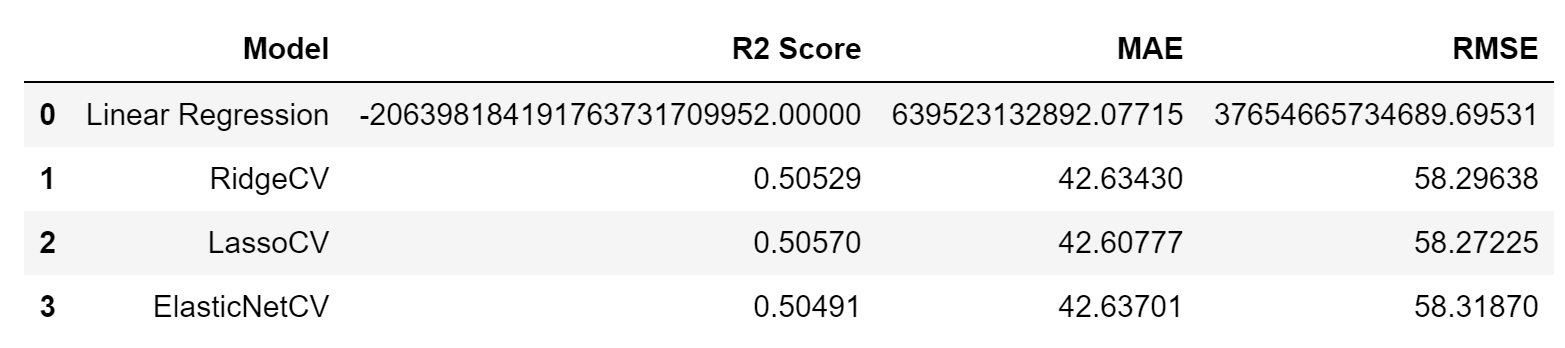

<b>Вариант 2.</b> Использовал вариант шкалирования StandardScaler, в датасете оставил только значимые признаки для линейной регрессии (остались следующие признаки: price, neighbourhood_group, room_type).
</br>В итоге метрики качества для линейной регрессии значительно улучшились (ушла аномалия), но для остальных алгоритмов показатели по сравнению с первым вариантом ухудшились.

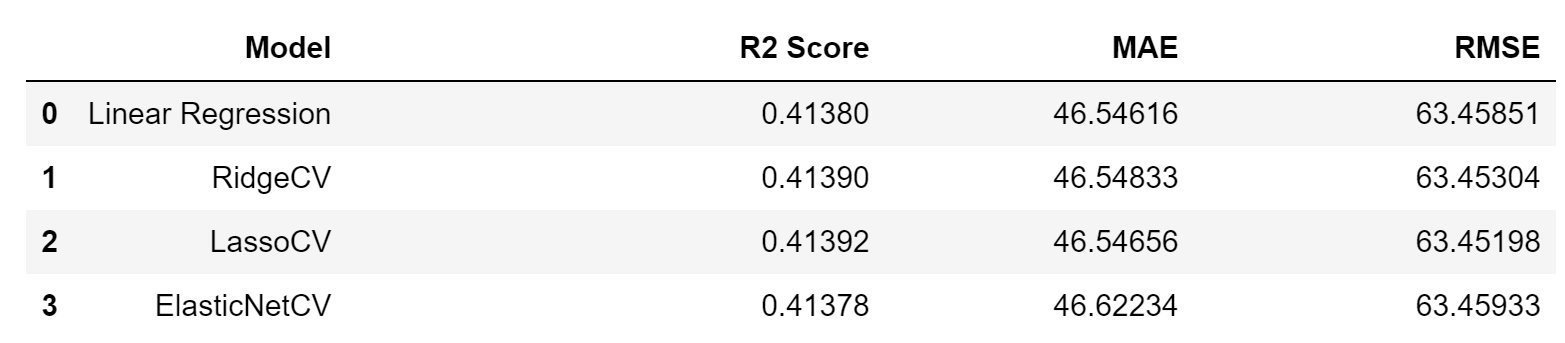

<b>Вариант 3.</b> Использовал вариант шкалирования StandardScaler, в датасете оставил только значимые признаки для линейной регрессии, также применил логарифмирование к целевой переменной price для улучшения её распределения.
</br>В итоге после преобразования целевой переменной (price) MAE и RMSE стали меньше, а R2 Score вырос. Это говорит о том, что преобразование целевой переменной привело к улучшению качества модели по сравнению с первым и вторым вариантом. Меньшее значения MAE и RMSE означают, что модель стала делать более точные прогнозы. Одновременно, увеличение R2 Score свидетельствует о том, что модель стала лучше объяснять вариацию в целевой переменной. Следовательно, это изменение в метриках указывает на улучшение производительности модели после преобразования целевой переменной.

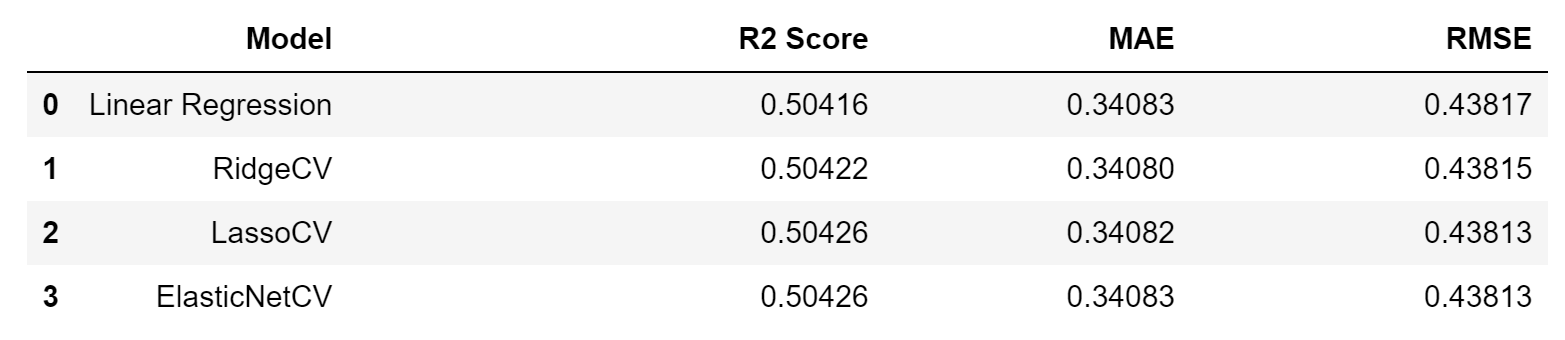

<b>Вариант 4.</b> Использовал вариант шкалирования StandardScaler, в датасете оставил наиболее важные признаки для линейной регрессии за исключением признаков 'latitude'и 'longitude', которые понадобятся для создания новой переменной "Расстояние", применил логарифмирование к целевой переменной price для улучшения её распределения, а также создал новую переменную "Расстояние".
</br>В итоге по сравнению с третьим вариантом все показатели улучшились на сотые доли для MAE и тысячные для R2 Score и RMSE.

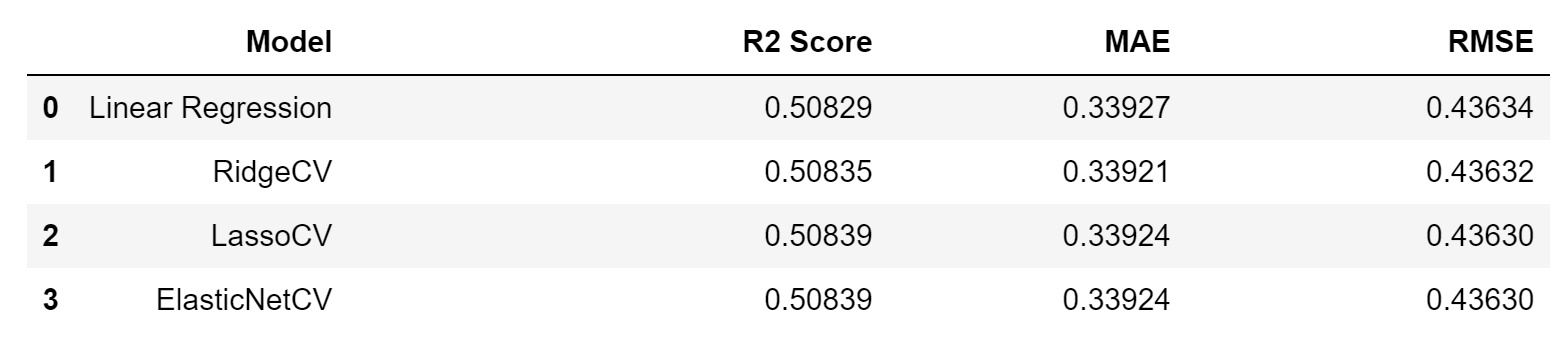

<b>Вариант 5.</b> В пятом варианте использовал ту же обработку данных, что и в четвёртом варианте, но вместо варианта шкалирования StandardScaler использовал вариант RobustScaler.
</br>В итоге по сравнению с четвёртым вариантом показатели улучшились на дсятитысячные доли, а в некоторых случаях не изменились. То есть метод шкалирования RobustScaler по сравнению методом StandardScaler сильного прироста не дал.

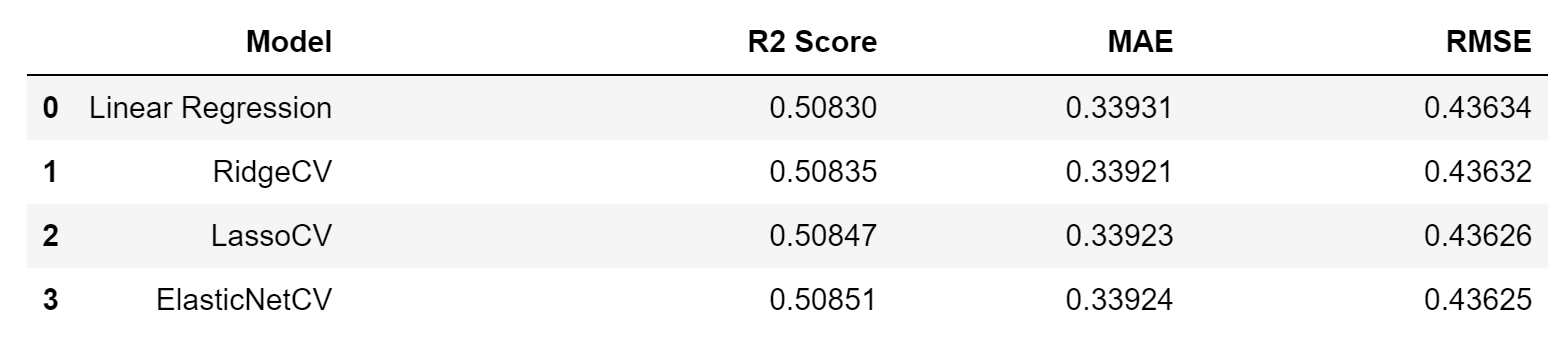

<b>Выводы.</b> Проведённые преобразования данных, включая выбор значимых признаков, применение логарифмирования целевой переменной, создание новой переменной "Расстояние", а также использование RobustScaler для шкалирования, привели к улучшению качества модели линейной регрессии. Возможно, более сложные модели, такие как случайный лес или градиентный бустинг, также дали бы улучшение результатов, что может быть интересным направлением для дальнейших исследований.

<b>Дополнительное исследование.</b> Я обучил модели с помощью алгоритмов случайный лес и градиентный бустинг,
чтобы посмотреть, как эти алгоритмы справляются с нашим датасетом и сравнить результаты с линейной регрессией.
Я использовал ту же обработку данных, что и в пятом варианте.

Исходя из полученных метрик качества, можно сделать следующие <b>выводы</b>:
</br><b>1.</b> Метрики качества для линейной регрессии показывают, что эта модель обладает неплохим качеством прогнозирования.
</br><b>2.</b> Модель случайного леса, напротив, показала худшие результаты по сравнению с линейной регрессией,
что может быть связано с необходимостью тщательного подбора параметров модели для достижения оптимального качества предсказаний.
</br><b>3.</b> В свою очередь, градиентный бустинг, оказавшийся лучшим из рассмотренных моделей,
продемонстрировал наилучшие результаты.
Это указывает на то, что градиентный бустинг справился с поставленной задачей более эффективно и точно, чем другие модели.

<b>Таким образом, основываясь на полученных метриках, можно заключить,
что градиентный бустинг наилучшим образом подходит для данного набора данных и задачи прогнозирования.</b>

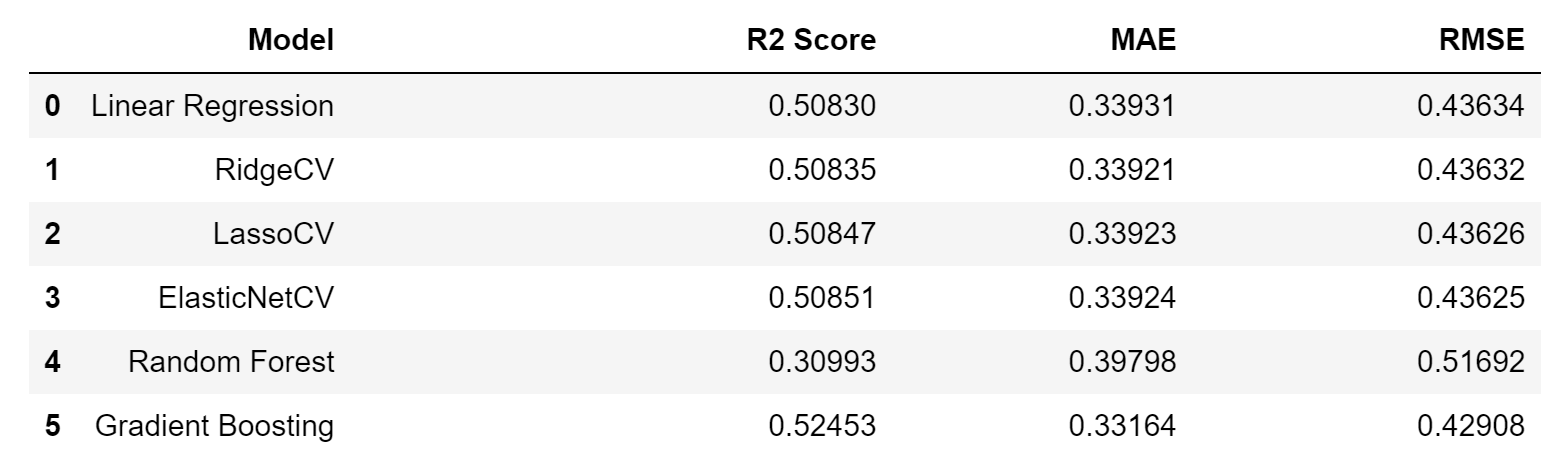

# Часть 1. EDA

1. Импортируем основные библиотеки.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

2. Считываем данные из CSV-файла. Выводим первые 5 строк, чтобы убедиться, что данные считались с локального файла.

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


3. Уберём ненужные признаки: id, name, host_id, host_name, last_review.

In [3]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1)

In [4]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
df.columns.tolist()

['neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

4. Приведём описание признаков.
* <b>neighbourhood_group</b> - группа региона,
* <b>neighbourhood</b> - район,
* <b>latitude</b> - широта,
* <b>longitude</b> - долгота,
* <b>room_type</b> - тип номера,
* <b>price</b> - цена,
* <b>minimum_nights</b> - минимум ночей,
* <b>number_of_reviews</b> - количество отзывов,
* <b>reviews_per_month</b> - отзывов в месяц,
* <b>calculated_host_listings_count</b> - расчётное количество списков хостов,
* <b>availability_365</b> - доступность 365.

И посмотрим на количество записей в файле.

In [6]:
df.shape

(48895, 11)

5. Посмотрим, какого типа эти данные:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


Посмотрим на базовые статистики датасета:
    среднее (mean), стандартное отклонение (std),
    минимальное (min) и максимальное (max) значения,
    медиану (50%) и значения квантилей:

In [8]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


6. Визуализируем базовые статистики данных: распределение признаков, матрицу попарных корреляций, построим pairplots.

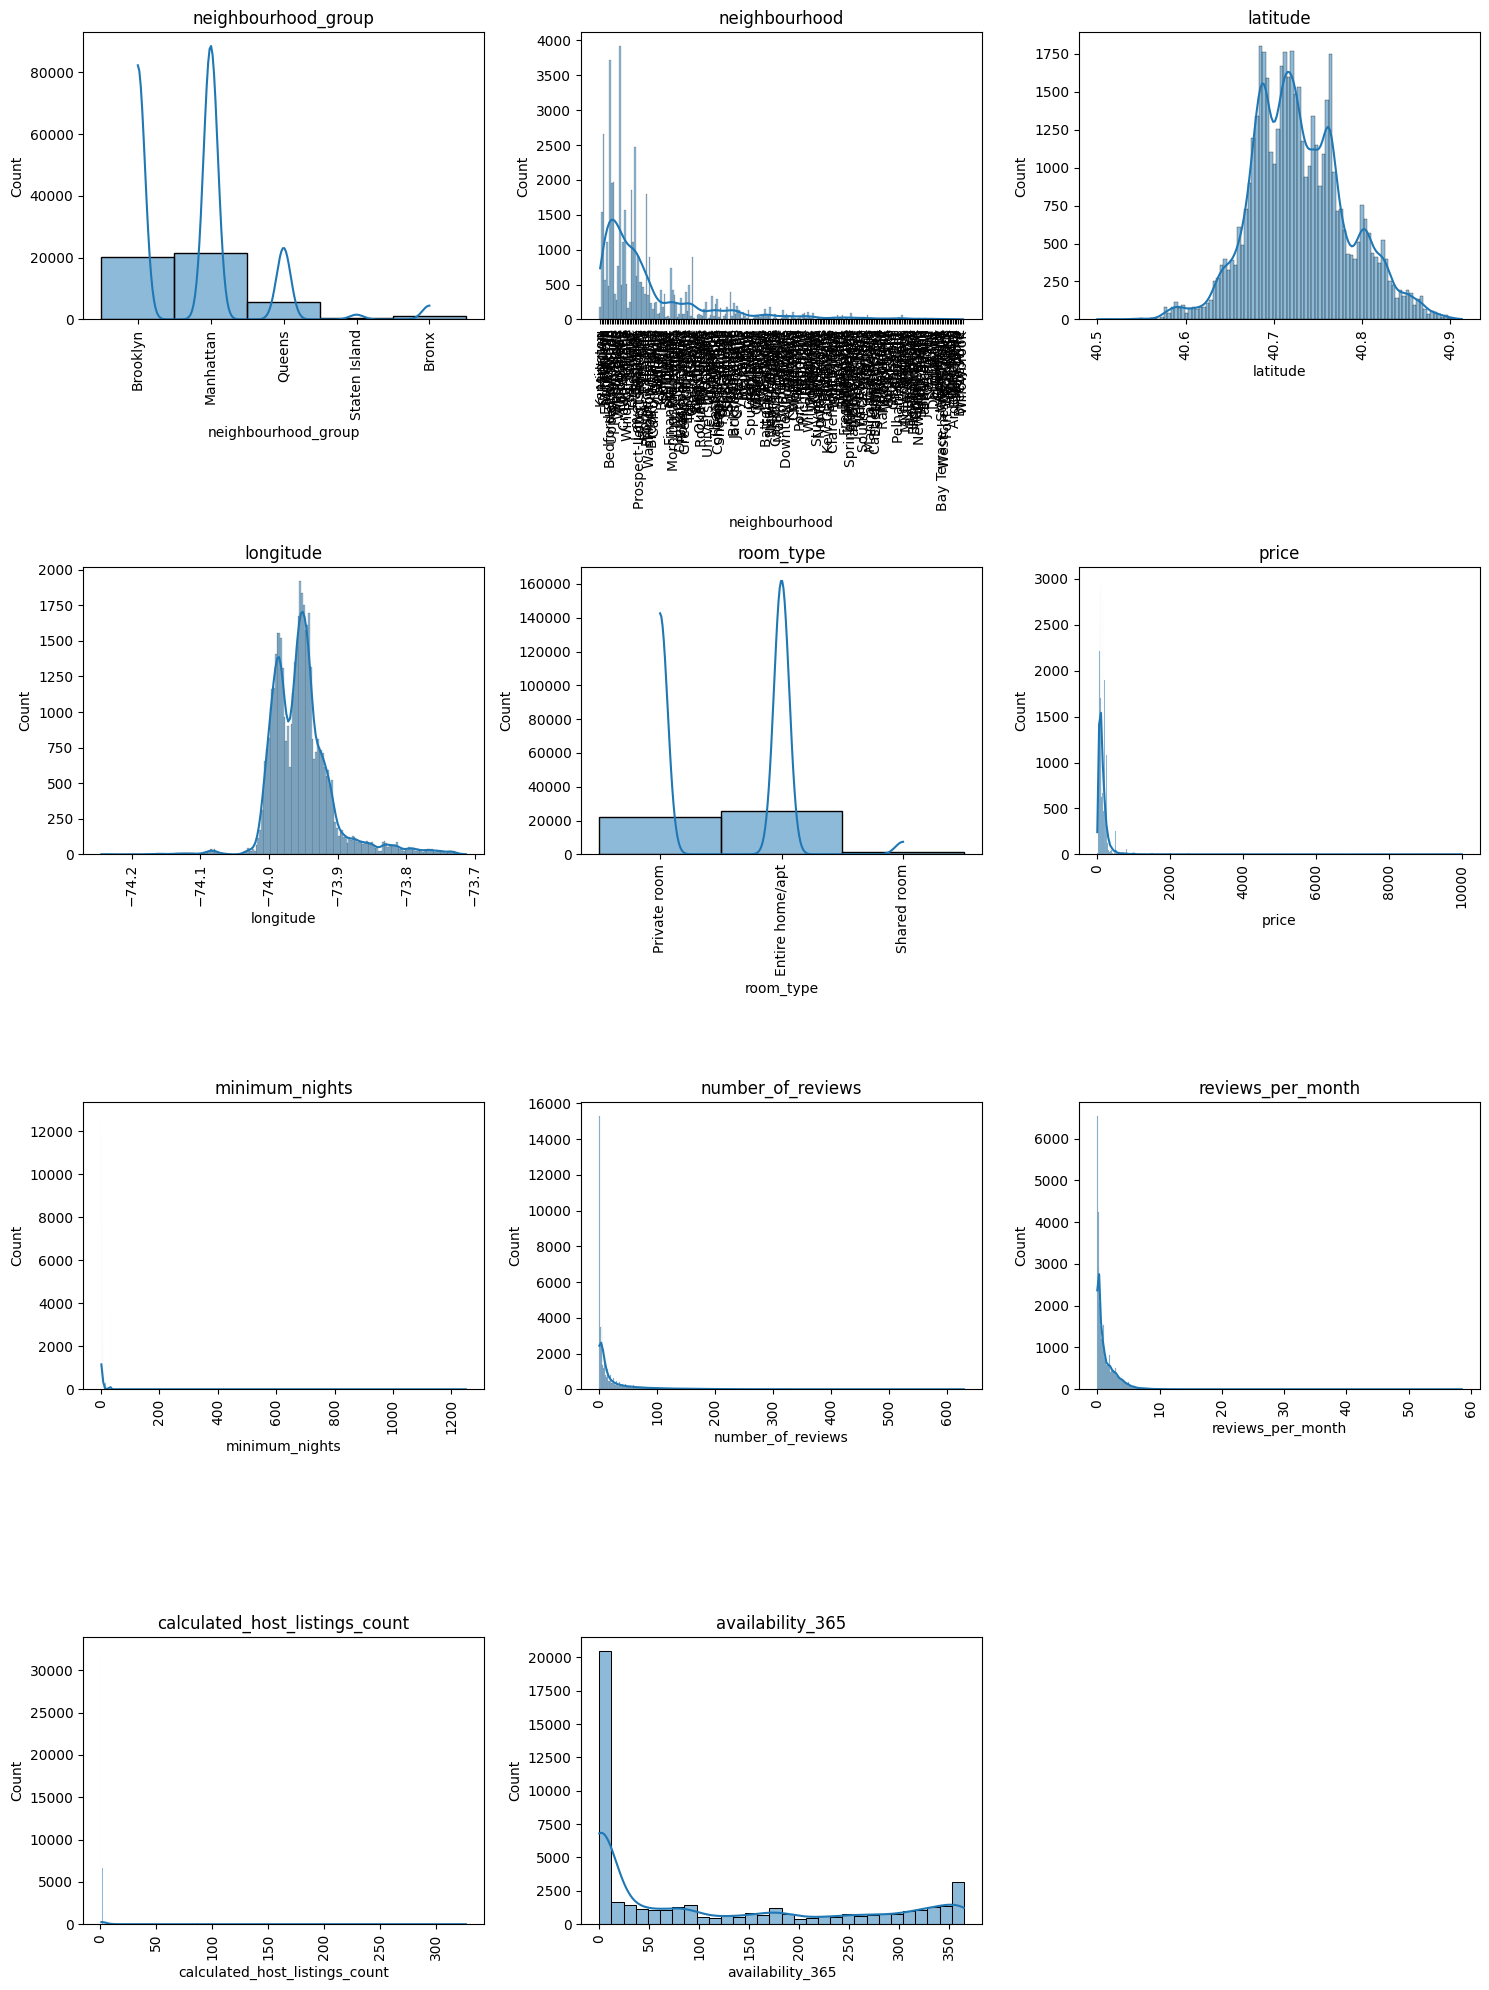

In [9]:
# Получим количество столбцов в DataFrame
num_cols = df.shape[1]

# Определим количество строк и столбцов для сетки графиков
num_rows = math.ceil(num_cols / 3)
num_columns = min(num_cols, 3)

# Распределения признаков
fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

# Удалим лишние пустые графики в последней строке, если количество столбцов не кратно трём
if num_cols < num_rows * num_columns:
    for i in range(num_cols, num_rows * num_columns):
        fig.delaxes(axs.flatten()[i])

for i, col in enumerate(df.columns):
    row_num = i // num_columns
    col_num = i % num_columns
    sns.histplot(df[col], kde=True, ax=axs[row_num, col_num])
    axs[row_num, col_num].xaxis.set_tick_params(rotation=90)  # Вертикальные надписи на оси x
    axs[row_num, col_num].set_title(col)  # Устанавливаем название столбца как заголовок

plt.tight_layout()  # Избегаем наложения графиков
plt.show()

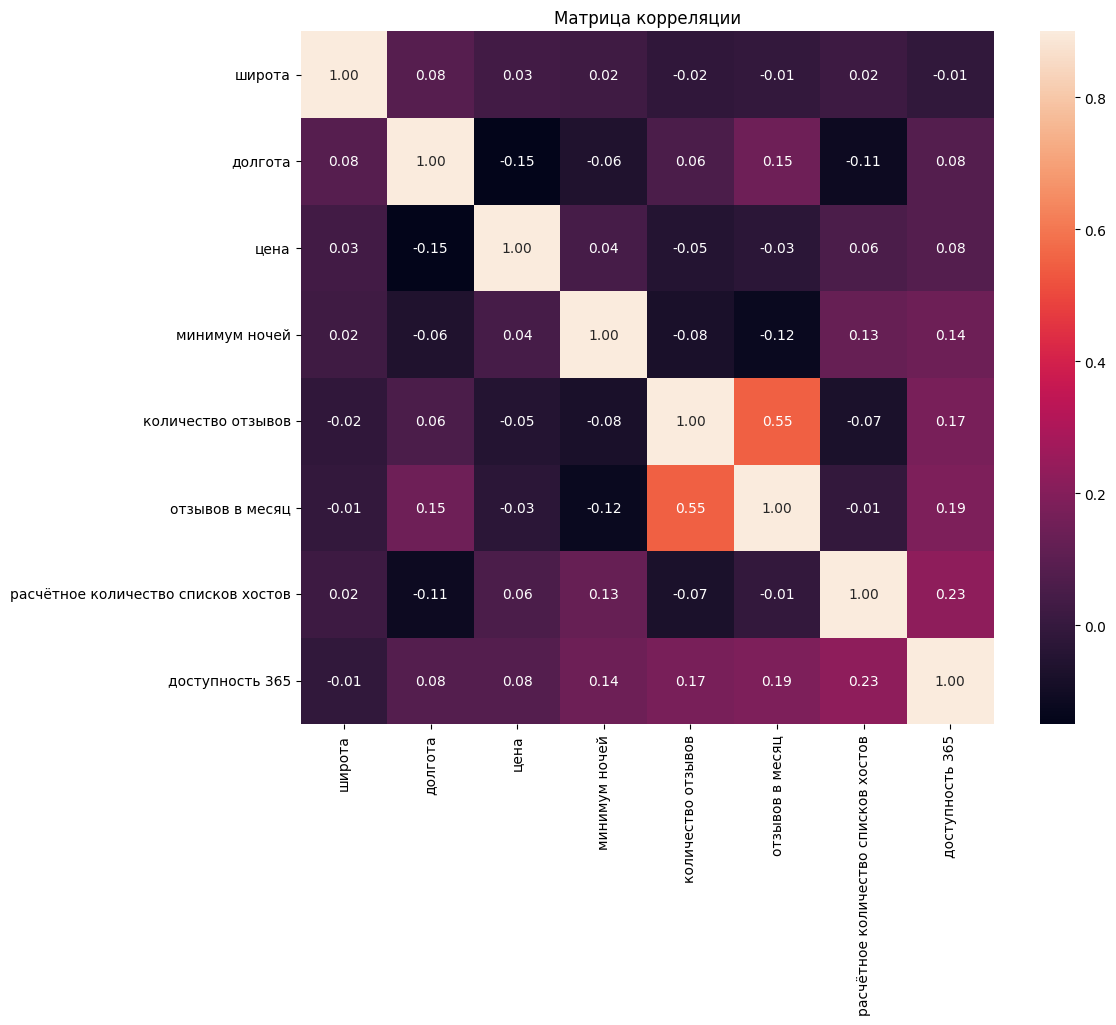

In [10]:
# Создание DataFrame с новыми именами столбцов
new_column_names = {
    'neighbourhood_group': 'группа региона',
    'neighbourhood': 'район',
    'latitude': 'широта',
    'longitude': 'долгота',
    'room_type': 'тип номера',
    'price': 'цена',
    'minimum_nights': 'минимум ночей',
    'number_of_reviews': 'количество отзывов',
    'reviews_per_month': 'отзывов в месяц',
    'calculated_host_listings_count': 'расчётное количество списков хостов',
    'availability_365': 'доступность 365',
}

# Переименование столбцов в исходном датасете
df_with_new_names = df.rename(columns=new_column_names)

# Фильтрация числовых столбцов
numerical_columns = df_with_new_names.select_dtypes(include=['number'])

# Построение матрицы корреляции
corrmat = numerical_columns.corr()

# Создание тепловой карты
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True, fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

Построим взаимосвзяь между ценой и типом номера.
</br>На графике видно, что стоимость shared room не превышает 2000 долларов.
</br>Private room в диапазоне до 2000 долларов, но есть несколько предложений и выше.
</br>Entire home/apt основной диапозн предложений до 4500 долларов,
но есть так же значительное количество предложений и до 10000 долларов.

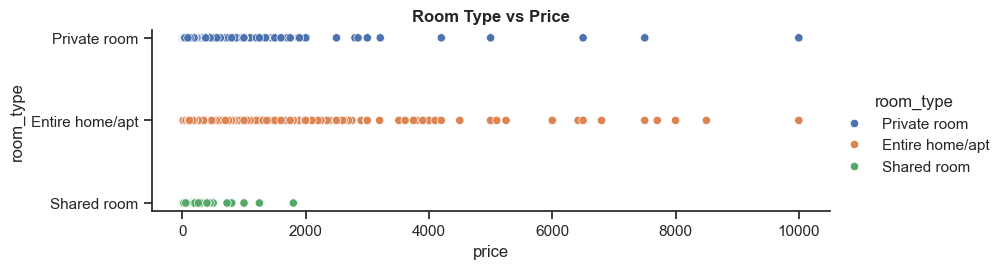

In [11]:
# Устанавливаем стиль графика
sns.set(style="ticks")

# Создаем pairplot
g = sns.pairplot(df, hue='room_type', y_vars=['room_type'], x_vars=['price'], markers='o', height=9)
g.fig.set_size_inches(10, 2)
plt.title("Room Type vs Price",size=12, weight='bold')
plt.show()

# Private room - Отдельный номер
# Entire home/apt - Весь дом/квартира
# Shared room - Номер, который делят

Построим взаимосвязь между ценой и типом номера в зависимости от группы региона.
</br>Самая высокая цена за Private room и Entire home/apt находятся в одном районе Манхэттена.
И в целом на район Манхэттена приходится самые дорогие Private room и Entire home/apt.
</br>В Бруклине очень высокие цены как на Private room, так и на Entire home/apt, но их количество меньше, чем в Манхэттене.
</br>Самая высокая цена за Shared room приходится на район Квинс.

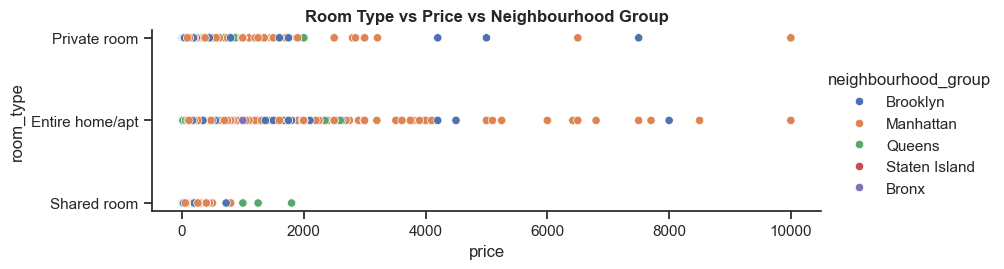

In [12]:
# Устанавливаем стиль графиков
sns.set(style="ticks")

# Построение pairplot
g = sns.pairplot(df, hue='neighbourhood_group', y_vars=['room_type'], x_vars=['price'], markers='o', height=9)
g.fig.set_size_inches(10, 2)
plt.title("Room Type vs Price vs Neighbourhood Group",size=12, weight='bold')
plt.show()

# Private room - Отдельный номер
# Entire home/apt - Весь дом/квартира
# Shared room - Номер, который делят

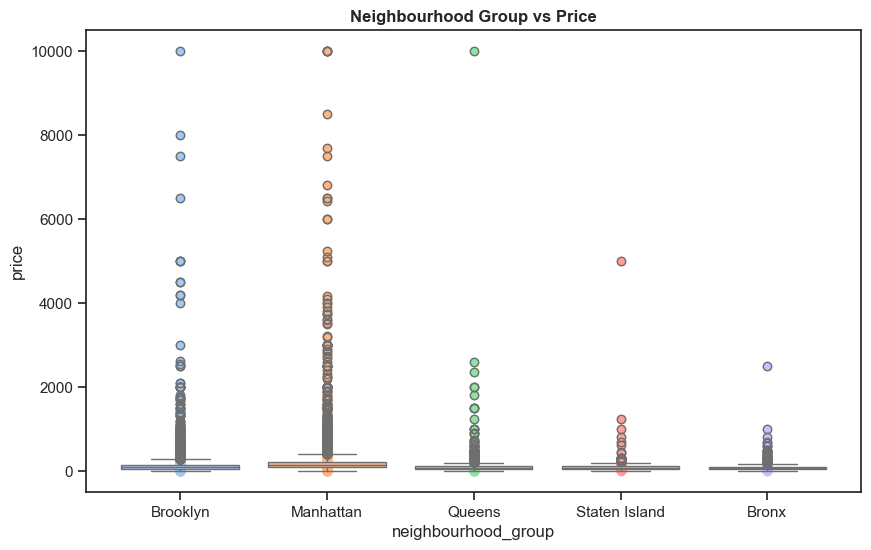

In [13]:
# Устанавливаем стиль графиков
sns.set(style="ticks")

# Построение боксплота
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='neighbourhood_group', y='price', data=df, hue='neighbourhood_group', palette='pastel')

# Добавление кружков на график
for i in range(len(df['neighbourhood_group'].unique())):
    group = df['neighbourhood_group'].unique()[i]
    color = sns.color_palette("pastel")[i]
    subset = df[df['neighbourhood_group'] == group]
    plt.scatter(x=[i]*len(subset), y=subset['price'], color=color, alpha=1.0)

plt.title('Neighbourhood Group vs Price', size=12, weight='bold')
plt.show()

# Private room - Отдельный номер
# Entire home/apt - Весь дом/квартира
# Shared room - Номер, который делят

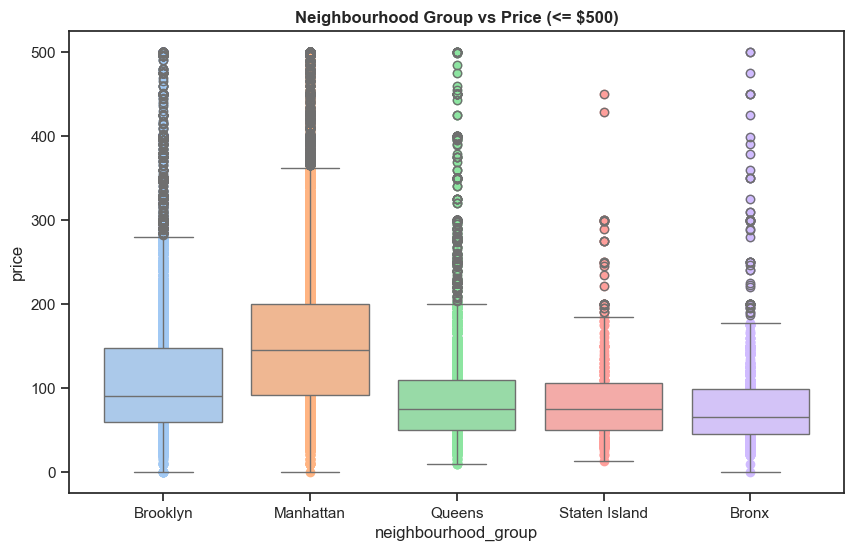

In [14]:
# Фильтрация данных по цене <= 500
filtered_df = df[df['price'] <= 500]

# Устанавливаем стиль графиков
sns.set(style="ticks")

# Построение боксплота с отфильтрованными данными
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='neighbourhood_group', y='price', data=filtered_df, hue='neighbourhood_group', palette='pastel')

# Добавление кружков на график
for i in range(len(filtered_df['neighbourhood_group'].unique())):
    group = filtered_df['neighbourhood_group'].unique()[i]
    color = sns.color_palette("pastel")[i]
    subset = filtered_df[filtered_df['neighbourhood_group'] == group]
    plt.scatter(x=[i]*len(subset), y=subset['price'], color=color, alpha=1.0)

plt.title('Neighbourhood Group vs Price (<= $500)', size=12, weight='bold')
plt.show()

Видим, что самое дорогое жильё в Манхеттене.

Посмотрим распределение цен до 1000$ на карте.

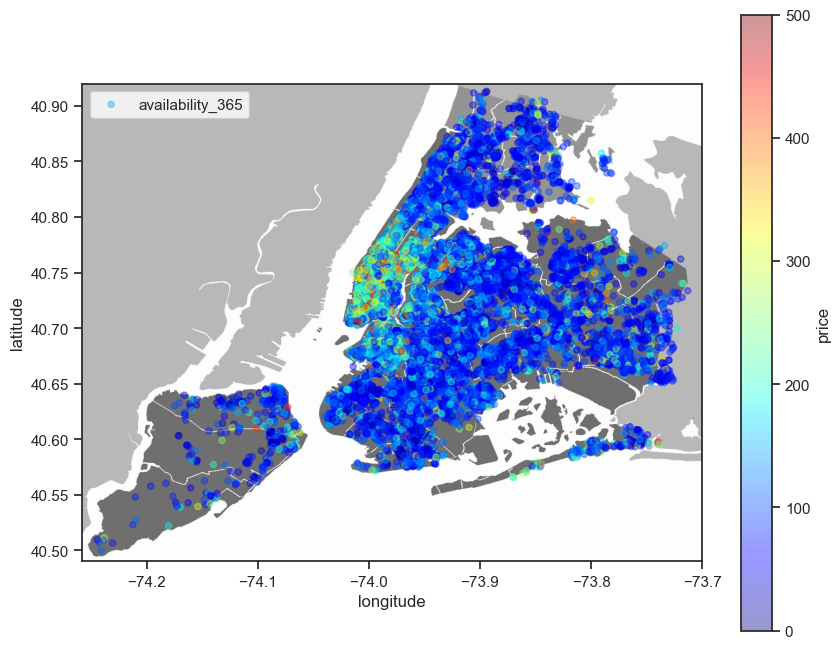

In [16]:
# Загрузка локальной картинки из корня проекта
nyc_img = plt.imread('NewYorkCity.png')

# Изменение размера графика
plt.figure(figsize=(10, 8))

# Отображение картинки
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

filtered_df = df[df['price'] <= 500]

# Использование scatterplot
filtered_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

# Добавление легенды
plt.legend()
plt.show()

Посмотрим распределение предложений с высокой ценой свыше 1000$ на карте.

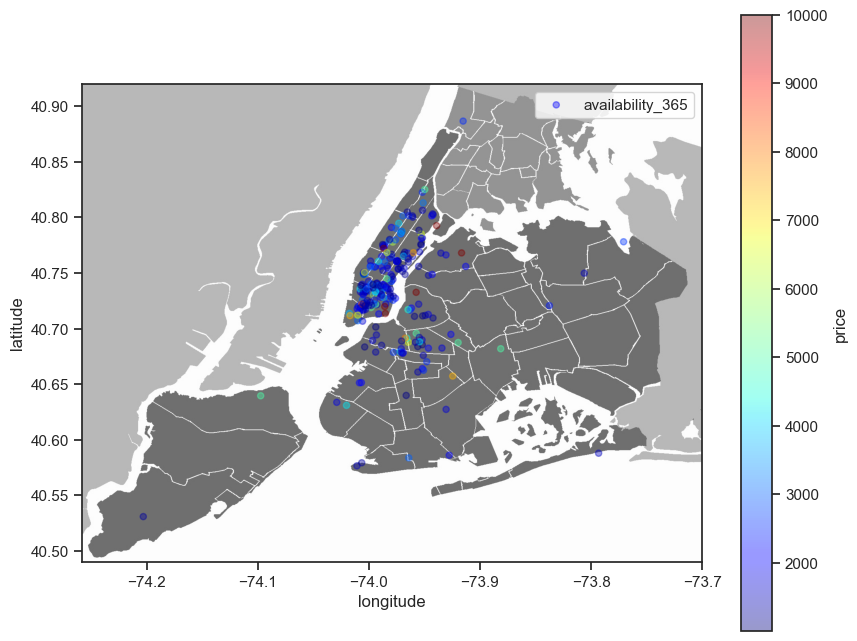

In [17]:
# Загрузка локальной картинки из корня проекта
nyc_img = plt.imread('NewYorkCity.png')

# Изменение размера графика
plt.figure(figsize=(10, 8))

# Отображение картинки
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

filtered_df2 = df[df['price'] > 1000]

# Использование scatterplot
filtered_df2.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

# Добавление легенды
plt.legend()
plt.show()

7. Нам потребуется:
* Обработка пропущенных значений.
    Можно заполнить пропущенные значения средними, медианными или наиболее часто встречающимися значениями,
    в зависимости от типа данных.
* Преобразовать категориальные переменные.
    Имеется несколько категориальных переменных, таких как "neighbourhood_group" и "room_type".
    Их можно преобразовать в числовой формат с помощью метода One-Hot Encoding или Label Encoding
    для использования в моделях машинного обучения.

<b>Обработаем пропущенные значения:</b>

In [18]:
np.round(df.isna().sum()[df.isna().sum()>0] / df.shape[0], 2)

reviews_per_month    0.21
dtype: float64

В признаке <b>"reviews_per_month"</b> (отзывы за месяц) 21% прорцент пропущенных значений.

Заполним пустые значения переменной <b>"reviews_per_month"</b>
значением 0 (предположим, что пустые значения означает, что отзывов в этот месяц не было).

In [19]:
df['reviews_per_month'].fillna(0, inplace=True)

In [20]:
np.round(df.isna().sum()[df.isna().sum()>0] / df.shape[0], 2)

Series([], dtype: float64)

# Часть 2. Preprocessing & Feature Engineering

<b>1. Поработаем с категориальными переменными.</b>

Для преобразования категориальных переменных существует несколько способов,
включая использование метода кодирования индикаторов (one-hot encoding)
или кодирования меток (label encoding).
1. One-Hot Encoding (Метод кодирования индикаторов): Этот метод создаёт новый столбец для каждого уникального значения
    в категориальной переменной.
2. Label Encoding (Кодирование меток): Этот метод назначает целочисленные метки каждому уникальному значению
    в категориальной переменной.

Выбор между этими методами зависит от особенностей данных и целей анализа.
One-Hot Encoding обычно предпочтительнее, поскольку он сохраняет информацию о категориях в виде бинарных флагов,
что позволяет избежать искажения результатов алгоритмов машинного обучения.
Однако при большом количестве уникальных значений в категориальном признаке это может привести к увеличению размера датасета.

In [21]:
# Преобразуем категориальные переменные методом One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type', 'neighbourhood'])
df_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,neighbourhood_Bull's Head,neighbourhood_Bushwick,neighbourhood_Cambria Heights,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Castle Hill,neighbourhood_Castleton Corners,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_City Island,neighbourhood_Civic Center,neighbourhood_Claremont Village,neighbourhood_Clason Point,neighbourhood_Clifton,neighbourhood_Clinton Hill,neighbourhood_Co-op City,neighbourhood_Cobble Hill,neighbourhood_College Point,neighbourhood_Columbia St,neighbourhood_Concord,neighbourhood_Concourse,neighbourhood_Concourse Village,neighbourhood_Coney Island,neighbourhood_Corona,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,neighbourhood_DUMBO,neighbourhood_Ditmars Steinway,neighbourhood_Dongan Hills,neighbourhood_Douglaston,neighbourhood_Downtown Brooklyn,neighbourhood_Dyker Heights,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East Morrisania,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Eastchester,neighbourhood_Edenwald,neighbourhood_Edgemere,neighbourhood_Elmhurst,neighbourhood_Eltingville,neighbourhood_Emerson Hill,neighbourhood_Far Rockaway,neighbourhood_Fieldston,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flatiron District,neighbourhood_Flatlands,neighbourhood_Flushing,neighbourhood_Fordham,neighbourhood_Forest Hills,neighbourhood_Fort Greene,neighbourhood_Fort Hamilton,neighbourhood_Fort Wadsworth,neighbourhood_Fresh Meadows,neighbourhood_Glendale,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Graniteville,neighbourhood_Grant City,neighbourhood_Gravesend,neighbourhood_Great Kills,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Grymes Hill,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Highbridge,neighbourhood_Hollis,neighbourhood_Holliswood,neighbourhood_Howard Beach,neighbourhood_Howland Hook,neighbourhood_Huguenot,neighbourhood_Hunts Point,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Jamaica Estates,neighbourhood_Jamaica Hills,neighbourhood_Kensington,neighbourhood_Kew Gardens,neighbourhood_Kew Gardens Hills,neighbourhood_Kingsbridge,neighbourhood_Kips Bay,neighbourhood_Laurelton,neighbourhood_Lighthouse Hill,neighbourhood_Little Italy,neighbourhood_Little Neck,neighbourhood_Long Island City,neighbourhood_Longwood,neighbourhood_Lower East Side,neighbourhood_Manhattan Beach,neighbourhood_Marble Hill,neighbourhood_Mariners Harbor,neighbourhood_Maspeth,neighbourhood_Melrose,neighbourhood_Middle Village,neighbourhood_Midland Beach,neighbourhood_Midtown,neighbourhood_Midwood,neighbourhood_Mill Basin,neighbourhood_Morningside Heights,neighbourhood_Morris Heights,neighbourhood_Morris Park,neighbourhood_Morrisania,neighbourhood_Mott Haven,neighbourhood_Mount Eden,neighbourhood_Mount Hope,neighbourhood_Murray Hill,neighbourhood_Navy Yard,neighbourhoo

<b>2. Обработаем аномалии.</b>

Как мы видели на графиках в первой части у нас довольно много выбросов по переменной price.
</br>Для замены аномалий, можно использовать методы Interquartile Range (IQR) или Замена на среднее/медиану.

In [22]:
df_encoded.describe().price.T

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [23]:
# Замена аномалий с использованием IQR
# Вычисляются первый (Q1) и третий (Q3) квартили (25% и 75% квантили) значения 'price' с помощью метода quantile().
# Это поможет определить центральную часть данных.
Q1 = df_encoded['price'].quantile(0.25)
Q3 = df_encoded['price'].quantile(0.75)

# Вычисляется межквартильный размах (IQR) путем вычитания Q1 из Q3.
# IQR предоставляет меру разброса значений в данных, устойчивую к влиянию выбросов.
IQR = Q3 - Q1

# Нижняя и верхняя границы для определения выбросов определяются, используя значения Q1, Q3 и IQR.
# Нижняя граница вычисляется как Q1 минус 1.5 умноженное на IQR, а верхняя граница как Q3 плюс 1.5 умноженное на IQR.
# Такой выбор множителя 1.5 является общепринятой практикой, однако его можно изменить в зависимости от конкретной ситуации.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Применяется функция lambda для проверки каждого значения в столбце 'price'.
# Если значение больше верхней границы, оно заменяется на верхнюю границу, если меньше нижней границы,
# заменяется на нижнюю границу. В противном случае значение остается без изменений.
df_encoded['price'] = df_encoded['price'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
df_encoded.describe().price.T

count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64

Скорректировалось максимальное значение цены. Было 10000.000000, стало 334.000000.

Посмотрим получившийся датасет.

In [24]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_encoded.head().T)

,0,1,2,3,4
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
price,149.0,225.0,150.0,89.0,80.0
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21,0.38,0.0,4.64,0.1
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0
neighbourhood_group_Bronx,False,False,False,False,False
neighbourhood_group_Brooklyn,True,False,False,True,False


# Часть 3. Моделирование

Построим модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
</br></br><b>Примечание.</b>
</br>
<b>Ridge и RidgeCV</b> - это два метода, связанные с регуляризацией в линейной регрессии.
Ridge применяет L2-регуляризацию, добавляя к функции потерь сумму квадратов весов с коэффициентом α.
Однако значение α обычно выбирается пользователем.
В отличие от этого, RidgeCV - это метод регрессии Ridge с кросс-валидацией,
который автоматически подбирает оптимальное значение параметра α из заданного диапазона при помощи кросс-валидации.
Это позволяет выбрать наилучшее значение α, улучшая производительность модели на тестовых данных.

<b>Lasso и LassoCV</b> также отличаются подходом к поиску оптимального значения параметра регуляризации.
Lasso использует L1-регуляризацию, которая добавляет сумму абсолютных значений весов с коэффициентом α к функции потерь.
В то время как LassoCV выполняет кросс-валидацию для выбора оптимального значения параметра α
из предварительно заданного диапазона.

<b>ElasticNet и ElasticNetCV</b> являются комбинациями L1- и L2-регуляризации.
ElasticNet добавляет как L1, так и L2 штраф к функции потерь, с двумя параметрами регуляризации: α и r.
Параметр α контролирует общую силу регуляризации, в то время как r определяет соотношение L1- и L2-регуляризации.
ElasticNetCV выполняет кросс-валидацию для одновременного выбора оптимальных значений α и r.

</br><b>Вариант 1.</b> Вариант шкалирования StandardScaler.

In [25]:
# Импорртируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [26]:
# Разделение на признаки и целевую переменную

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Разделение данных на тренировочный и тестовый наборы

# test_size=0.3. Тестовый набор данных составляет 30% от исходного набора
# random_state установлен в 42 для воспроизводимости случайного разбиения
# Если не устанавливать random_state каждый раз, когда мы будем выполнять случайное разбиение данных или инициализацию моделей,
# мы будем получать разные результаты, в некоторых случаях это может затруднить воспроизводимость экспериментов и исследований.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание экземпляров моделей

# Создаются экземпляры моделей: LinearRegression, RidgeCV, LassoCV и ElasticNetCV.
# Эти модели используются для построения регрессионных моделей линейной регрессии с различными методами регуляризации.
lin_reg = LinearRegression()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()
elasticnet_cv = ElasticNetCV()

# Обучение моделей

# Данные масштабируются с помощью StandardScaler, который приводит признаки к нулевому среднему и единичной дисперсии.
# Это важно для моделей, которые чувствительны к масштабированию данных, таких как линейная регрессия.
# Чтобы не подглядывать в тест, обучать `scaler` необходимо на `train`, а не на всех данных. 
# ни в коем случае не применяйте метод `fit_transform` к test, только `transform`.
# Иначе у вас могут получится разные масштабы для `train` (условно км) и `test` (условно м),
# и ваша обученная модель на тесте "сойдет с ума"!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение моделей происходит путем преобразования обучающих данных после масштабирования и фактического обучения моделей,
# чтобы они могли "выучить" отношения между признаками и целевой переменной.
# Например, в строке lin_reg.fit(X_train_scaled, y_train) происходит обучение модели линейной регрессии (lin_reg)
# на обучающем наборе данных (X_train_scaled, y_train).
# Обучение модели означает, что модель "подстраивается" под обучающие данные, т.е. она настраивает свои параметры,
# чтобы минимизировать ошибку предсказания целевой переменной (y_train) на основе признаков (X_train_scaled).
# После этого модель будет готова к предсказанию целевой переменной на новых данных.
lin_reg.fit(X_train_scaled, y_train)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elasticnet_cv.fit(X_train_scaled, y_train)

# Измерение качества моделей

# Создаём список моделей и имен моделей для дальнейшего измерения их качества на тестовых данных.
models = [lin_reg, ridge_cv, lasso_cv, elasticnet_cv]
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

results = []

# В цикле для каждой модели рассчитываются метрики качества: среднеквадратичная ошибка (MSE),
# коэффициент детерминации (R2 Score), средняя абсолютная ошибка (MAE)
# и корень из среднеквадратичной ошибки (RMSE) с использованием тестовых данных.
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, round(r2, 5), round(mae, 5), round(rmse, 5)])

# Результаты измерения качества моделей добавляются в таблицу results_df,
# которая затем выводится в виде DataFrame с результатами для каждой модели.
results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,-206398184191763731709952.00000,639523132892.07715,37654665734689.69531
1,RidgeCV,0.50529,42.63430,58.29638
2,LassoCV,0.50570,42.60777,58.27225
3,ElasticNetCV,0.50491,42.63701,58.31870


Видим аномальные значения метрик для линейной регрессии.

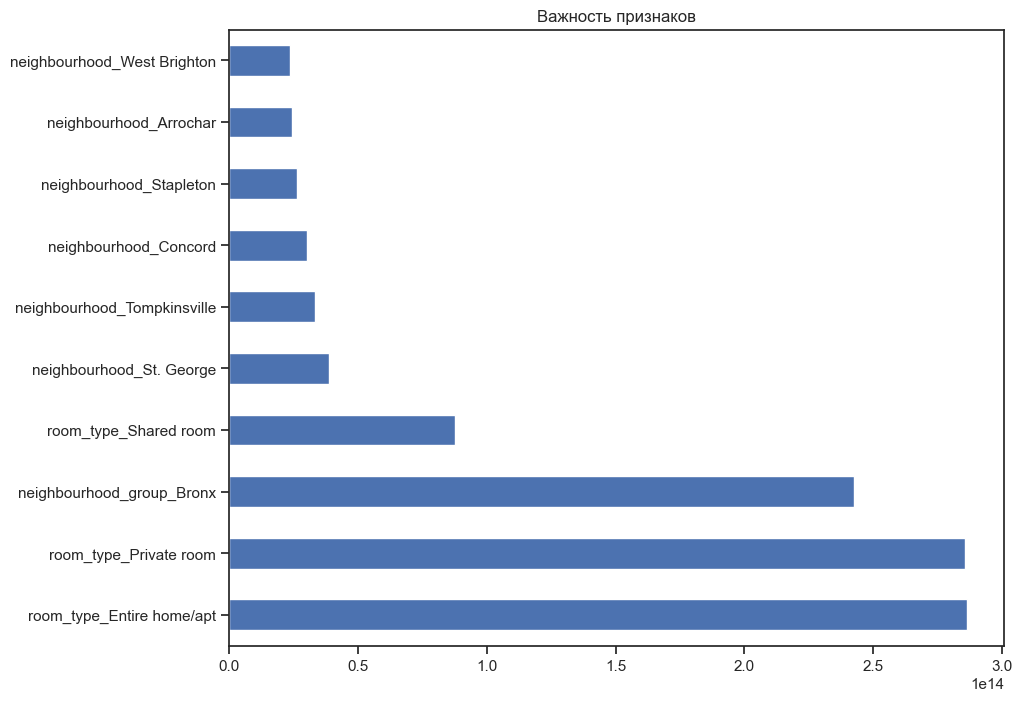

In [27]:
# Визуализация важности признаков для линейной регрессии
# используем lin_reg.coef_, чтобы получить коэффициенты модели линейной регрессии,
# которые отражают, насколько каждый признак влияет на целевую переменную.
# Эти коэффициенты сохраняются в объекте pd.Series,
# и индексы этого объекта устанавливаются равными названиям признаков (колонок) из исходного набора данных X.
coef = pd.Series(lin_reg.coef_, index=X.columns)
plt.figure(figsize=(10,8))

# строим столбчатую диаграмму, на которой отображаются 10 наиболее важных признаков
# из coef (то есть те признаки, у которых коэффициенты имеют наибольшее абсолютное значение).
# Эти признаки отображаются в виде горизонтальных столбцов диаграммы.
coef.nlargest(10).plot(kind='barh')
plt.title('Важность признаков')
plt.show()

Построим модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
</br><b>Вариант 2.</b> Вариант шкалирования StandardScaler. Оставили наиболее важные признаки для линейной регресии.

Из графика выше видно, что наиболее значимые признаки для построения линейной регрессии являются тип помещения и группа региона.
</br>Попробуем убрать незначимые признаки и повторить оценку качества модели.

In [28]:
# Найдем столбцы, соответствующие признаку neighbourhood
neighbourhood_columns = df_encoded.filter(like='neighbourhood').columns

# Обратное преобразование One-Hot Encoding для признака neighbourhood
df_encoded['neighbourhood'] = df_encoded[neighbourhood_columns].idxmax(axis=1).str.replace('neighbourhood_', '')

# Найдем столбцы, соответствующие признаку neighbourhood, но исключим из них признак neighbourhood_group
neighbourhood_columns = neighbourhood_columns[~neighbourhood_columns.str.contains('neighbourhood_group')]

# Удаляем старые закодированные столбцы, связанные с признаком neighbourhood
df_encoded = df_encoded.drop(neighbourhood_columns, axis=1)

df_encoded.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood
0,40.64749,-73.97237,149.00000,1,9,0.21000,6,365,False,True,False,False,False,False,True,False,group_Brooklyn
1,40.75362,-73.98377,225.00000,1,45,0.38000,2,355,False,False,True,False,False,True,False,False,group_Manhattan
2,40.80902,-73.94190,150.00000,3,0,0.00000,1,365,False,False,True,False,False,False,True,False,group_Manhattan
3,40.68514,-73.95976,89.00000,1,270,4.64000,1,194,False,True,False,False,False,True,False,False,group_Brooklyn
4,40.79851,-73.94399,80.00000,10,9,0.10000,1,0,False,False,True,False,False,True,False,False,group_Manhattan


In [29]:
columns_to_drop = [
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood',
]
df_encoded_opt2 = df_encoded.drop(columns=columns_to_drop)
df_encoded_opt2.head()

,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,149.00000,False,True,False,False,False,False,True,False
1,225.00000,False,False,True,False,False,True,False,False
2,150.00000,False,False,True,False,False,False,True,False
3,89.00000,False,True,False,False,False,True,False,False
4,80.00000,False,False,True,False,False,True,False,False


In [30]:
# Разделение на признаки и целевую переменную
X = df_encoded_opt2.drop('price', axis=1)
y = df_encoded_opt2['price']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание экземпляров моделей
lin_reg = LinearRegression()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()
elasticnet_cv = ElasticNetCV()

# Обучение моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train_scaled, y_train)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elasticnet_cv.fit(X_train_scaled, y_train)

# Измерение качества моделей
models = [lin_reg, ridge_cv, lasso_cv, elasticnet_cv]
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, round(r2, 5), round(mae, 5), round(rmse, 5)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.41380,46.54616,63.45851
1,RidgeCV,0.41390,46.54833,63.45304
2,LassoCV,0.41392,46.54656,63.45198
3,ElasticNetCV,0.41378,46.62234,63.45933


Видим, что метрики для линейной регрессии значительно улучшились (ушла аномалия),
но для остальных алгоритмов показатели по сравнению с первым вариантом ухудшились.

Построим модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
</br><b>Вариант 3.</b> Вариант шкалирования StandardScaler.
Оставили наиболее важные признаки для линейной регресии. Обработали целевую переменную.

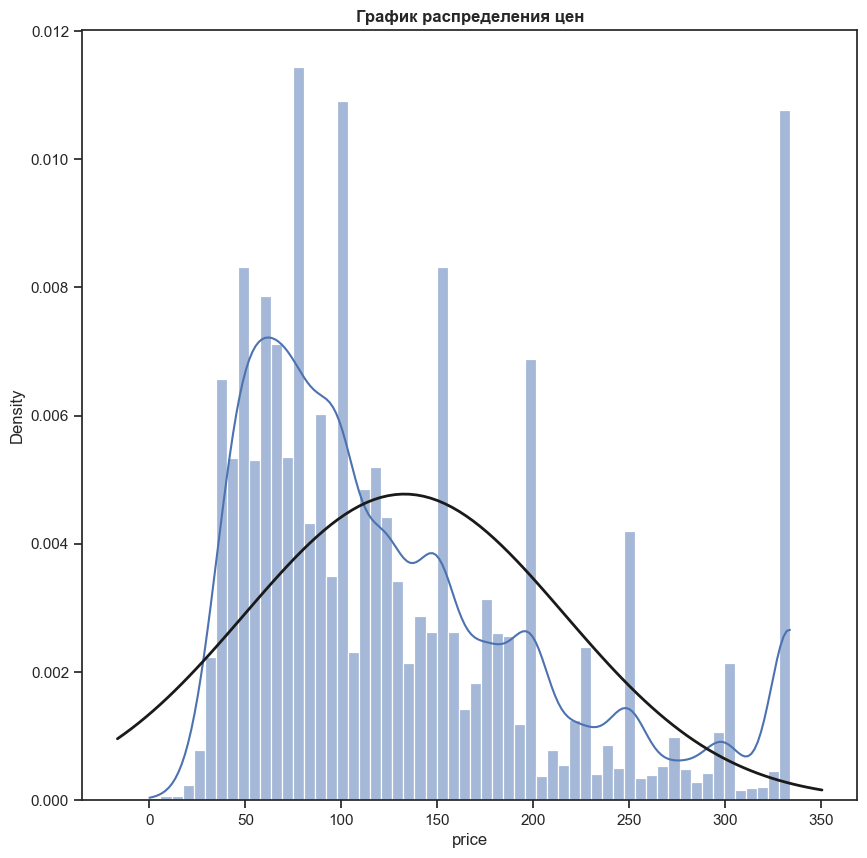

In [31]:
from scipy.stats import norm

# Строим гистограмму
plt.figure(figsize=(10,10))
sns.histplot(df_encoded['price'], kde=True, stat='density')

# Наложение кривой нормального распределения
mu, std = norm.fit(df_encoded['price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title("График распределения цен", size=12, weight='bold')
plt.show()

Улучшим распределение целевой переменной price. Мы можем применить логарифмирование к целевой переменной для улучшения её распределения.

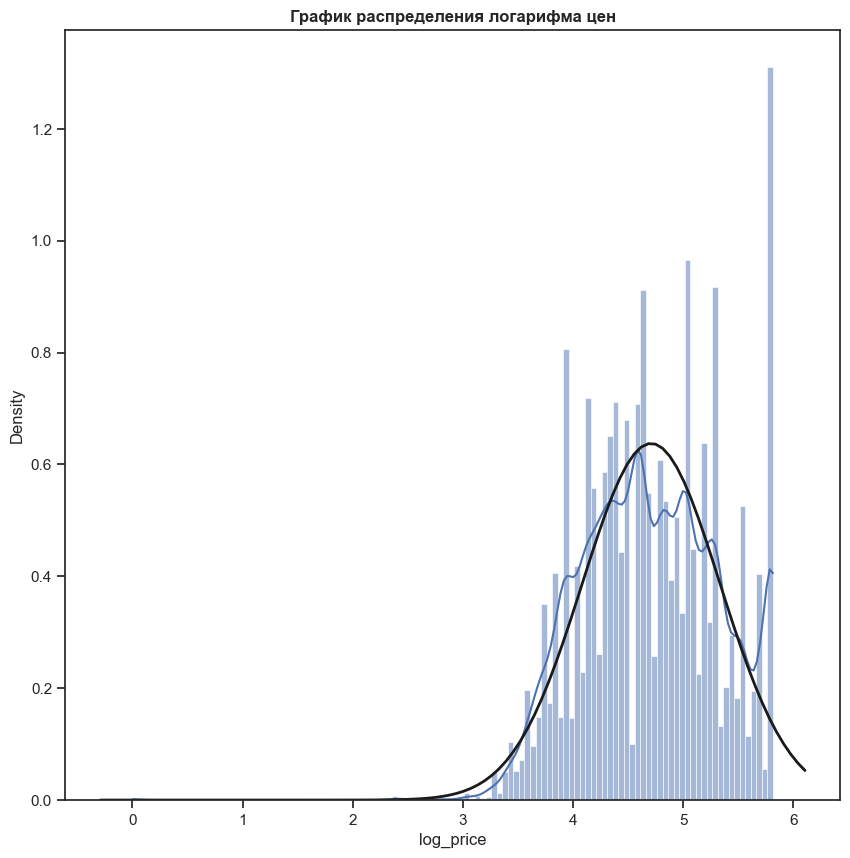

In [32]:
# Применение логарифмирования к целевой переменной 'price'
df_encoded['log_price'] = np.log1p(df_encoded['price'])

# Строим гистограмму
plt.figure(figsize=(10,10))
sns.histplot(df_encoded['log_price'], kde=True, stat='density')

# Наложение кривой нормального распределения
mu, std = norm.fit(df_encoded['log_price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title("График распределения логарифма цен", size=12, weight='bold')
plt.show()

Видим, что график со значениями целевой переменной стал больше похож на нормальное распределение.

In [33]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.00000,40.72895,0.05453,40.49979,40.69010,40.72307,40.76311,40.91306
longitude,48895.00000,-73.95217,0.04616,-74.24442,-73.98307,-73.95568,-73.93627,-73.71299
price,48895.00000,132.97975,83.53050,0.00000,69.00000,106.00000,175.00000,334.00000
minimum_nights,48895.00000,7.02996,20.51055,1.00000,1.00000,3.00000,5.00000,1250.00000
number_of_reviews,48895.00000,23.27447,44.55058,0.00000,1.00000,5.00000,24.00000,629.00000
reviews_per_month,48895.00000,1.09091,1.59728,0.00000,0.04000,0.37000,1.58000,58.50000
calculated_host_listings_count,48895.00000,7.14398,32.95252,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,48895.00000,112.78133,131.62229,0.00000,0.00000,45.00000,227.00000,365.00000
log_price,48895.00000,4.70826,0.62569,0.00000,4.24850,4.67283,5.17048,5.81413


In [34]:
columns_to_drop = [
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood',
    'price',
]
df_encoded_opt3 = df_encoded.drop(columns=columns_to_drop)
df_encoded_opt3.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price
0,False,True,False,False,False,False,True,False,5.01064
1,False,False,True,False,False,True,False,False,5.42053
2,False,False,True,False,False,False,True,False,5.01728
3,False,True,False,False,False,True,False,False,4.49981
4,False,False,True,False,False,True,False,False,4.39445


In [35]:
# Разделение на признаки и целевую переменную
X = df_encoded_opt3.drop('log_price', axis=1)
y = df_encoded_opt3['log_price']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание экземпляров моделей
lin_reg = LinearRegression()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()
elasticnet_cv = ElasticNetCV()

# Обучение моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train_scaled, y_train)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elasticnet_cv.fit(X_train_scaled, y_train)

# Измерение качества моделей
models = [lin_reg, ridge_cv, lasso_cv, elasticnet_cv]
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, round(r2, 5), round(mae, 5), round(rmse, 5)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.50416,0.34083,0.43817
1,RidgeCV,0.50422,0.34080,0.43815
2,LassoCV,0.50426,0.34082,0.43813
3,ElasticNetCV,0.50426,0.34083,0.43813


Видим, что после преобразования целевой переменной (price) MAE и RMSE стали меньше, а R2 Score вырос.
Это говорит о том, что преобразование целевой переменной привело к улучшению качества модели
по сравнению с первым и вторым вариантом.
Меньшее значения MAE и RMSE означают, что модель стала делать более точные прогнозы.
Одновременно, увеличение R2 Score свидетельствует о том, что модель стала лучше объяснять вариацию в целевой переменной.
Следовательно,
это изменение в метриках указывает на улучшение производительности модели после преобразования целевой переменной.

Построим модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
</br><b>Вариант 4.</b> Вариант шкалирования StandardScaler.
Оставили наиболее важные признаки для линейной регрессии за исключением признаков 'latitude'и 'longitude',
которые понадобятся для создания новой переменной "Расстояние".
Обработали целевую переменную. Создали новую переменную "Расстояние".

Найдём координаты Манхэттена (самого дорогого района) и при помощи широты и долготы,
а также евклидового расстояния создадим новую переменную - расстояние от квартиры до этого района.
</br>В интернете сказано, что координатами Манхеттена (широта, долгота) являются: <b>40.7834, -73.9662</b> соответственно.
Их и возьмём за расчёт.

In [36]:
#!pip install geopy

In [37]:
from geopy.distance import geodesic

# Задаем координаты Манхэттена
manhattan_coords = (40.7834, -73.9662)

# Вычисляем расстояние от каждой квартиры до Манхэттена
distances = df_encoded.apply(lambda row: geodesic(manhattan_coords, (row['latitude'], row['longitude'])).miles, axis=1)

# Создаем новый столбец в датафрейме
df_encoded['distance_to_manhattan'] = distances

In [38]:
df_encoded.head().T

,0,1,2,3,4
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.94190,-73.95976,-73.94399
price,149.00000,225.00000,150.00000,89.00000,80.00000
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9
reviews_per_month,0.21000,0.38000,0.00000,4.64000,0.10000
calculated_host_listings_count,6,2,1,1,1
availability_365,365,355,365,194,0
neighbourhood_group_Bronx,False,False,False,False,False
neighbourhood_group_Brooklyn,True,False,False,True,False


In [39]:
columns_to_drop = [
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'neighbourhood',
    'price',
]
df_encoded_opt4 = df_encoded.drop(columns=columns_to_drop)
df_encoded_opt4.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,log_price,distance_to_manhattan
0,False,True,False,False,False,False,True,False,5.01064,9.38369
1,False,False,True,False,False,True,False,False,5.42053,2.25217
2,False,False,True,False,False,False,True,False,5.01728,2.17926
3,False,True,False,False,False,True,False,False,4.49981,6.78861
4,False,False,True,False,False,True,False,False,4.39445,1.56327


In [40]:
# Разделение на признаки и целевую переменную
X = df_encoded_opt4.drop('log_price', axis=1)
y = df_encoded_opt4['log_price']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание экземпляров моделей
lin_reg = LinearRegression()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()
elasticnet_cv = ElasticNetCV()

# Обучение моделей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg.fit(X_train_scaled, y_train)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elasticnet_cv.fit(X_train_scaled, y_train)

# Измерение качества моделей
models = [lin_reg, ridge_cv, lasso_cv, elasticnet_cv]
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, round(r2, 5), round(mae, 5), round(rmse, 5)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.50829,0.33927,0.43634
1,RidgeCV,0.50835,0.33921,0.43632
2,LassoCV,0.50839,0.33924,0.43630
3,ElasticNetCV,0.50839,0.33924,0.43630


Как видим, по сравнению с третьим вариантом все показатели улучшились на сотые доли.

Построим модели простой линейной регрессии, RidgeCV, LassoCV и ElasticNetCV.
</br><b>Вариант 5.</b> Вариант шкалирования RobustScaler.
Оставили наиболее важные признаки для линейной регресии.
Обработали целевую переменную. Создали новую переменную "Расстояние".

In [46]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np

# Разделение на признаки и целевую переменную
X = df_encoded_opt4.drop('log_price', axis=1)
y = df_encoded_opt4['log_price']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание экземпляров моделей
lin_reg = LinearRegression()
ridge_cv = RidgeCV()
lasso_cv = LassoCV()
elasticnet_cv = ElasticNetCV()

# Масштабирование данных
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение моделей
lin_reg.fit(X_train_scaled, y_train)
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elasticnet_cv.fit(X_train_scaled, y_train)

# Измерение качества моделей
models = [lin_reg, ridge_cv, lasso_cv, elasticnet_cv]
model_names = ['Linear Regression', 'RidgeCV', 'LassoCV', 'ElasticNetCV']

results = []

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append([name, round(r2, 5), round(mae, 5), round(rmse, 5)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.50830,0.33931,0.43634
1,RidgeCV,0.50835,0.33921,0.43632
2,LassoCV,0.50847,0.33923,0.43626
3,ElasticNetCV,0.50851,0.33924,0.43625


Как видим, по сравнению с четвёртым вариантом показатели улучшились на тысячные доли, а в некоторых случаях не изменились. То есть метод шкалирования RobustScaler по сравнению  методом StandardScaler сильного прироста не дал.

# Дополнительное исследование

Попробуем применить для наших данных другие методы обучения - случайный лес и градиентный бустинг.

In [47]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Создание экземпляра модели случайного леса
rf_reg = RandomForestRegressor(random_state=42)

# Обучение модели случайного леса
rf_reg.fit(X_train_scaled, y_train)

# Измерение качества модели случайного леса
y_pred_rf = rf_reg.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Добавление результатов в DataFrame
results.append(['Random Forest', round(r2_rf, 5), round(mae_rf, 5), round(rmse_rf, 5)])

# Создание экземпляра модели градиентного бустинга
gb_reg = GradientBoostingRegressor(random_state=42)

# Обучение модели градиентного бустинга
gb_reg.fit(X_train_scaled, y_train)

# Измерение качества модели градиентного бустинга
y_pred_gb = gb_reg.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Добавление результатов в DataFrame
results.append(['Gradient Boosting', round(r2_gb, 5), round(mae_gb, 5), round(rmse_gb, 5)])

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])
results_df

,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.50830,0.33931,0.43634
1,RidgeCV,0.50835,0.33921,0.43632
2,LassoCV,0.50847,0.33923,0.43626
3,ElasticNetCV,0.50851,0.33924,0.43625
4,Random Forest,0.30993,0.39798,0.51692
5,Gradient Boosting,0.52453,0.33164,0.42908


Исходя из полученных метрик качества, можно сделать следующие <b>выводы</b>:
</br><b>1.</b> Метрики качества для линейной регрессии показывают, что эта модель обладает неплохим качеством прогнозирования.
</br><b>2.</b> Модель случайного леса, напротив, показала худшие результаты по сравнению с линейной регрессией,
что может быть связано с необходимостью тщательного подбора параметров модели для достижения оптимального качества предсказаний.
</br><b>3.</b> В свою очередь, градиентный бустинг, оказавшийся лучшим из рассмотренных моделей,
продемонстрировал наилучшие результаты.
Это указывает на то, что градиентный бустинг справился с поставленной задачей более эффективно и точно, чем другие модели.

Таким образом, основываясь на полученных метриках, можно заключить,
что градиентный бустинг наилучшим образом подходит для данного набора данных и задачи прогнозирования.